In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, Latex, Math

#Training Dataset

Create a  training dataset of 100 examples with a single feature and a lable

In [ ]:
#@title
w0 = 2
w1 = 7
n = 100
X = 10*np.random.rand(n,)
y = w0 + w1 * X + np.random.randn(n,)

In [ ]:
#@title
X.shape

(100,)

In [ ]:
#@title
y.shape

(100,)

In [ ]:
#@title
X[:5]

array([8.3281886 , 1.23395387, 7.66924863, 5.87304704, 8.07832643])

In [ ]:
#@title
y[:5]

array([58.28352247, 10.28260904, 54.09092304, 42.76584069, 57.66546848])

In [ ]:
#@title
t = np.random.rand(10,)
t

array([0.62958164, 0.29342926, 0.78229029, 0.45999132, 0.26747434,
       0.63630739, 0.21604543, 0.16360746, 0.58860615, 0.13926235])

In [ ]:
#@title
t = np.linspace(1,10,20)
t

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [ ]:
#@title
t = np.random.randint(1,10,20)
t

array([9, 7, 5, 4, 5, 3, 6, 9, 9, 9, 6, 3, 9, 2, 6, 4, 7, 2, 9, 8])

#Plot Training Points and Preprocess

In [ ]:
def preprocess(X,y):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
  return (X_train, X_test, y_train,y_test)

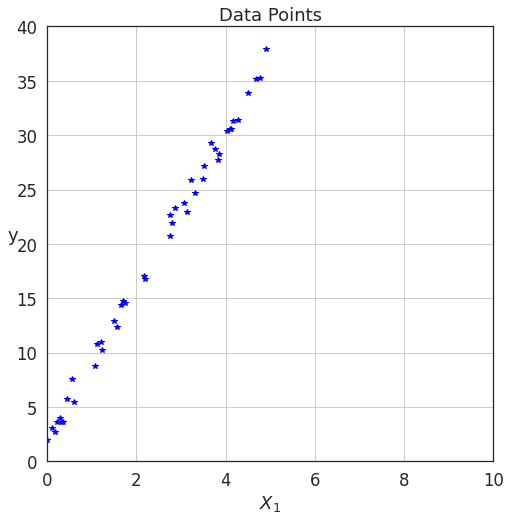

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2
                                                    , random_state = 42)


sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b*")
plt.title("Data Points")
plt.xlabel("$X_1$",fontsize = 18)
plt.ylabel("y",fontsize = 18, rotation = 0)
plt.grid(True)
plt.axis([0, 10, 0, 40])
plt.show()




#Add dummy feature



In [ ]:
def add_dummy_feature(X):
  return np.column_stack((np.ones(X.shape[0]),X))

# test case
t = add_dummy_feature(np.array([[3,2,3],[2,6,5]]))
t

array([[1., 3., 2., 3.],
       [1., 2., 6., 5.]])

In [ ]:
X_train = add_dummy_feature(X_train)
X_train[:5]

array([[1.        , 1.65476209],
       [1.        , 0.30116397],
       [1.        , 8.41348182],
       [1.        , 8.97000952],
       [1.        , 4.11456126]])

In [ ]:
w = np.random.rand(2,)
w

array([0.68446109, 0.03403173])

In [ ]:
y_train[:5]

array([14.37573671,  4.00294702, 60.81882489, 67.08307642, 30.57080913])

#Non vectorised Predict

- Model

   We know that $\ \mathbf{y} = \mathbf{Xw} $

   Always assert X.shape[-1] == w.shape[0]





In [ ]:
def predict (X,w):
  assert X.shape[-1] == w.shape[0]
  return X @ w

In [ ]:
y_hat = predict(X_train,w)
y_hat[:5]

array([0.74077551, 0.69471022, 0.97078644, 0.98972604, 0.82448673])

##TestCase Code as sample

In [ ]:
import unittest

class TestPredict(unittest.TestCase):

  def test_predict(self):
    train_matrix = np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    predicted_label_vector = predict(train_matrix,weight_vector)

    self.assertEqual(predicted_label_vector.shape,(2,))

    np.testing.assert_array_equal(expected_label_vector, predicted_label_vector)

unittest.main(argv=[''],defaultTest = 'TestPredict', verbosity = 2, exit = False)

test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


In [ ]:
def non_vectorised_predict(X,w):
  y = []
  for i in range(0,X.shape[0]): # run on example
    y_hat_i = 0
    for j in range(0,X.shape[1]): # run on features
      y_hat_i += X[i][j] * w[j]
    y.append(y_hat_i)
  return np.array(y)

- Loss

$$\ Loss Function $$ $$ \mathbf{J(w)} = \frac {1}{2} \mathbf{(Xw-y)^T}  \mathbf{(Xw-y)}$$


In [ ]:
def loss(X,y,w):
    e = predict(X,w) - y
    return (1/2) * (np.transpose(e) @ e)


In [ ]:
def visualize_loss_for_single_feature_model(X_train,y_train,w):
    y_hat = predict(X_train,w)
    fig, axes = plt.subplots(figsize=(8,8))
    axes.plot(X_train[:,1],y_train, 'b.', label = 'Training')
    axes.scatter(X_train[:,1], y_hat, c = 'g', label = 'Data Points')
    axes.vlines(X_train[:,1], y_hat, y_train, 'r', label = 'Loss')
    plt.grid(True)
    plt.show()

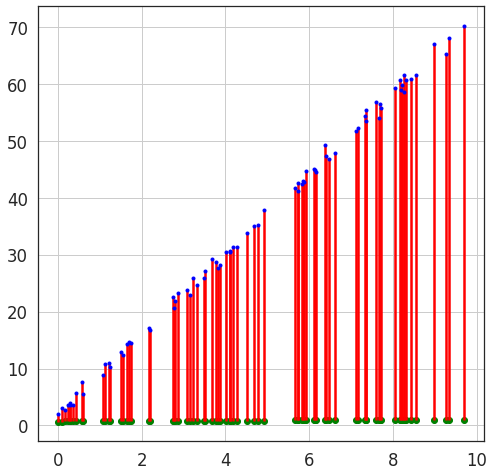

In [ ]:
visualize_loss_for_single_feature_model(X_train,y_train,w)

- Loss for assumed weight vector

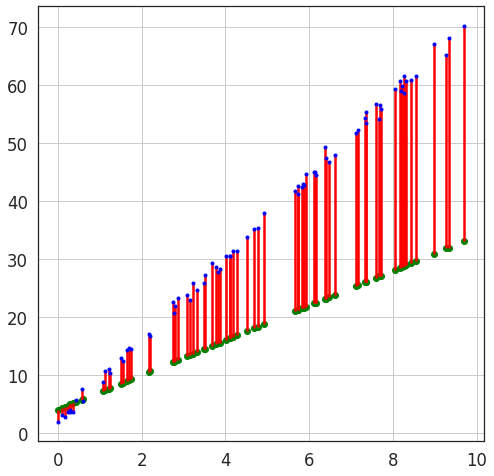

In [ ]:
visualize_loss_for_single_feature_model(X_train,y_train,np.array([4,3]))

- Optimization

In [ ]:
#Normal equation ($X$^-1 @ y) (X Inverse) * y
def normal_equation(X,y):
  return np.linalg.pinv(X) @ y


In [ ]:
t = normal_equation(X_train,y_train)
print(f"Calculated weight:{t}, Actual weight:{w0 ,w1} ")

Calculated weight:[1.98233966 7.04588941], Actual weight:(2, 7) 


- Gradient Descent

$$\ \mathbf{w}_{new} = w_{(0)} - 𝛼 ({X^T} (Xw - y))  $$

In [ ]:
def calculate_gradient_descent(X,y,w):
  return np.transpose(X) @ (predict(X,w)-y)

For feature Matrix X : [[1,3,2,5],
                        [1,9,4,7]]

Weight vector w : [1,1,1,1]

Label y : [6,11]

gradient descent = [15,105,50,95]

In [ ]:
t = calculate_gradient_descent(np.array([[1,3,2,5],[1,9,4,7]]),np.array([6,11]),np.array([1,1,1,1]))
t

array([ 15, 105,  50,  95])

- Update weights

In [ ]:
def update_weights(w, grad, lr:float):
  #w_new = w_old - lr * grad
  return (w - (lr * grad))

w_old = [1,1,1,1]

grad = [15,105,50,95]

lr = 0.001

w_new = [0.985,0.895,0.95,0.905]

In [ ]:
t = update_weights(np.array([1,1,1,1]),np.array([15,105,50,95]),lr=0.001)
t

array([0.985, 0.895, 0.95 , 0.905])

- Gradient descent Procedure


In [ ]:
def gradient_descent(X:np.ndarray,y:np.ndarray,lr:float,num_epochs:int):
  w_all = []
  error_all = []

  w = np.zeros(X.shape[1])

  for i in range(0, num_epochs):
    w_all.append(w)
    error_all.append(loss(X,y,w))
    djdw = calculate_gradient_descent(X,y,w)

    if i%100 == 0:
      print('Iteration #: %d, loss: %4.2f'%(i, error_all[-1]))

    w = update_weights(w, djdw, lr)
  return w, error_all, w_all

In [ ]:
X_train,X_test,y_train,y_test = preprocess(X,y)
X_train = add_dummy_feature(X_train)
w, err, w_all = gradient_descent(X_train,y_train,lr=0.0001,num_epochs=2000)
w

Iteration #: 0, loss: 63276.90
Iteration #: 100, loss: 34.53
Iteration #: 200, loss: 32.83
Iteration #: 300, loss: 31.72
Iteration #: 400, loss: 30.99
Iteration #: 500, loss: 30.50
Iteration #: 600, loss: 30.19
Iteration #: 700, loss: 29.98
Iteration #: 800, loss: 29.85
Iteration #: 900, loss: 29.76
Iteration #: 1000, loss: 29.70
Iteration #: 1100, loss: 29.66
Iteration #: 1200, loss: 29.63
Iteration #: 1300, loss: 29.62
Iteration #: 1400, loss: 29.61
Iteration #: 1500, loss: 29.60
Iteration #: 1600, loss: 29.60
Iteration #: 1700, loss: 29.59
Iteration #: 1800, loss: 29.59
Iteration #: 1900, loss: 29.59


array([1.96990438, 7.04787526])

In [ ]:
y_train[:5]

array([14.37573671,  4.00294702, 60.81882489, 67.08307642, 30.57080913])

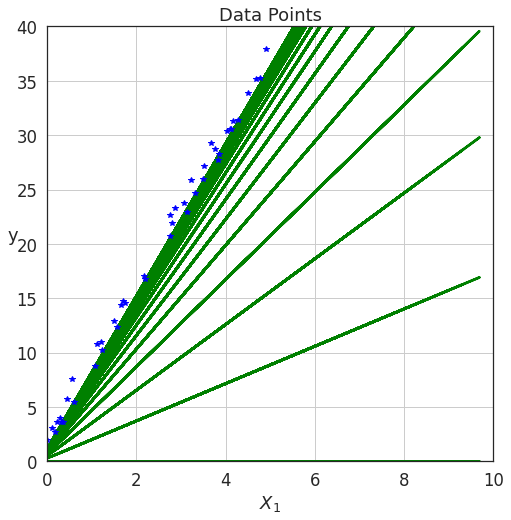

In [ ]:
sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2.5})

for i in range(15):
  y_plt = predict(X_train,w_all[i])
  plt.plot(X_train[:,1],y_plt,"g")


plt.plot(X_train[:,1],y_train,"b*")
plt.title("Data Points")
plt.xlabel("$X_1$",fontsize = 18)
plt.ylabel("y",fontsize = 18, rotation = 0)
plt.grid(True)
plt.axis([0, 10, 0, 40])
plt.show()





- Plot learning Curve

Text(0, 0.5, '$\\ J(w)$')

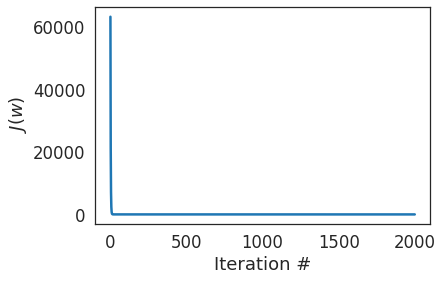

In [ ]:
plt.plot(err)
plt.xlabel("Iteration #")
plt.ylabel("$\ J(w)$")

# Try different learning rate and observe loss using above Programs


In [ ]:
w, err, w_all = gradient_descent(X_train,y_train,lr=0.000001,num_epochs=2000)
w

Iteration #: 0, loss: 63276.90
Iteration #: 100, loss: 39202.52
Iteration #: 200, loss: 24292.85
Iteration #: 300, loss: 15059.04
Iteration #: 400, loss: 9340.37
Iteration #: 500, loss: 5798.70
Iteration #: 600, loss: 3605.27
Iteration #: 700, loss: 2246.83
Iteration #: 800, loss: 1405.51
Iteration #: 900, loss: 884.46
Iteration #: 1000, loss: 561.75
Iteration #: 1100, loss: 361.88
Iteration #: 1200, loss: 238.09
Iteration #: 1300, loss: 161.41
Iteration #: 1400, loss: 113.91
Iteration #: 1500, loss: 84.48
Iteration #: 1600, loss: 66.25
Iteration #: 1700, loss: 54.94
Iteration #: 1800, loss: 47.93
Iteration #: 1900, loss: 43.57


array([1.17139625, 7.11427763])

Text(0, 0.5, '$\\ J(w)$')

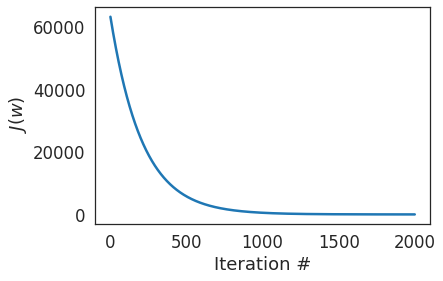

In [ ]:
plt.plot(err)
plt.xlabel("Iteration #")
plt.ylabel("$\ J(w)$")

#Mini-Batch Gradient descent

In [ ]:
#learning_schedule
t0, t1 = 200, 10000
def learning_schedule(t):
  return t0 / (t+t1)


In [ ]:
def mini_batch_gradient_descent(X:np.ndarray,y:np.ndarray,num_iters:int,mini_batch_size:int):
  w_all = []
  err_all = []

  w = np.zeros(X.shape[1])
  t = 0

  for epoch in range(num_iters):
    shuffled_indices = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,X.shape[0],mini_batch_size):
      t += 1
      xi = X_shuffled[i:i+mini_batch_size]
      yi = y_shuffled[i:i+mini_batch_size]
      err_all.append(loss(xi,yi,w))

      gradients = 2/mini_batch_size * calculate_gradient_descent(xi,yi,w)
      lr = learning_schedule(t)

      w = update_weights(w,gradients,lr)
      w_all.append(w)

  return w, err_all, w_all

In [ ]:
w, err, w_all = mini_batch_gradient_descent(X_train,y_train,num_iters=20, mini_batch_size = 8)
w

array([1.86431309, 7.03757676])

Text(0, 0.5, '$\\ J(w)$')

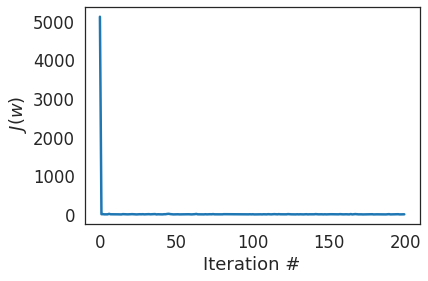

In [ ]:
plt.plot(err)
plt.xlabel("Iteration #")
plt.ylabel("$\ J(w)$")

#Stochastic Gradinet descent

In [ ]:
def sgd(X:np.ndarray, y:np.ndarray, num_epochs:int):
  w_all = []
  err_all =[]

  w = np.zeros(X.shape[1])

  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]

      err_all.append(loss(xi,yi,w))

      gradients = 2 * calculate_gradient_descent(xi,yi,w)
      lr = learning_schedule(epoch * X.shape[0] + i)

      w = update_weights(w,gradients,lr)
      w_all.append(w)
  return w, err_all, w_all


In [ ]:
w, err, w_all = sgd(X_train,y_train,100)

w

array([1.93523398, 7.1290205 ])

Text(0, 0.5, '$\\ J(w)$')

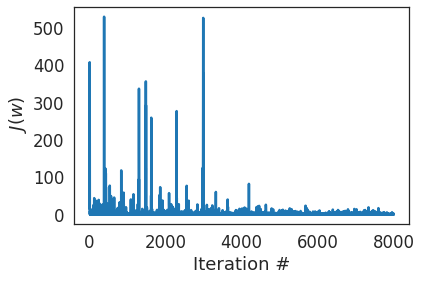

In [ ]:
plt.plot(err)
plt.xlabel("Iteration #")
plt.ylabel("$\ J(w)$")

#Combining all components

In [ ]:
class LinReg(object):
  """
  y = X@w
  X: A feature matrix
  w : weight vector
  y: label vector

  """
  def __init__(self):
    self.t0 = 20
    self.t1 = 100000

  def predict(self,X:np.ndarray):
    y = X @ self.w
    return y
  
  def loss(self, X:np.ndarray, y:np.ndarray):
    e =  self.predict(X)-y
    return ((1/2)*(np.transpose(e) @ e))

  def rmse (self, X:np.ndarray, y:np.ndarray):
    return np.sqrt((2/X.shape[0]) * self.loss(X,y)) #2/n * loss
  
  def fit (self, X:np.ndarray, y:np.ndarray):
    self.w = np.linalg.pinv(X) @ y
    return self.w
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray):
    return(np.transpose(X) @ (self.predict(X)-y))
  
  def update_weights(self, grad:np.ndarray, lr:float):
    return(self.w - lr*grad)

  def learning_schedule(self,t):
    return self.t0 / (t+self.t1)

  def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    for i in np.arange(0,num_epochs):
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      djdw = self.calculate_gradient(X,y)
      self.w = self.update_weights(djdw,lr)
    return self.w

  def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    mini_batch_id = 0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0,X.shape[0],batch_size):
        mini_batch_id += 1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2/batch_size * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(mini_batch_id))
    return self.w

  def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
 
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
       
        random_index = np.random.randint(X.shape[0])
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2 * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(epoch * X.shape[0] + i))
    return self.w

In [ ]:
lin_reg = LinReg()
lin_reg.fit(X_train,y_train)
lin_reg.w

array([1.98233966, 7.04588941])

In [ ]:
lin_reg = LinReg()
lin_reg.gd(X_train,y_train,1000,0.0001)
lin_reg.w

array([1.88038963, 7.06217029])

In [ ]:
lin_reg = LinReg()
lin_reg.mbgd(X_train,y_train,2000,16)
lin_reg.w

array([1.67533572, 7.09491961])

In [ ]:
lin_reg = LinReg()
lin_reg.sgd(X_train,y_train,1000)
lin_reg.w

array([1.97840585, 7.04264963])

#Linear Regression with Multiple features

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples = 200, n_features = 10, n_informative = 10, n_targets = 1, shuffle = True, coef=True, noise = 0.5, random_state = 0)
coef

array([40.05104636, 10.32532207, 51.90989393,  6.18447832, 41.09157343,
       28.46940664, 88.97621358,  9.68032193, 15.48694157, 44.96944303])

In [ ]:
X.shape

(200, 10)

In [ ]:
y.shape

(200,)

In [ ]:
X_train, X_test, y_train, y_test = preprocess(X,y)

In [ ]:
lin_reg = LinReg()
lin_reg.fit(X_train,y_train)
lin_reg.w

array([40.03304087, 10.30857515, 51.90901225,  6.2925958 , 41.16233243,
       28.44231093, 88.95471265,  9.75735333, 15.47270973, 44.99797352])

In [ ]:
lin_reg = LinReg()
lin_reg.gd(X_train,y_train,1000,0.001)
lin_reg.w

array([40.03304087, 10.30857515, 51.90901225,  6.2925958 , 41.16233243,
       28.44231093, 88.95471265,  9.75735333, 15.47270973, 44.99797352])

Text(0, 0.5, '$\\ J(w)$')

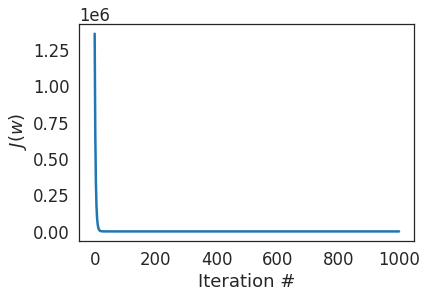

In [ ]:
plt.plot(lin_reg.err_all)
plt.xlabel("Iteration #")
plt.ylabel("$\ J(w)$")

In [ ]:
lin_reg = LinReg()
lin_reg.mbgd(X_train,y_train,2000,16)
lin_reg.w

array([40.00877843, 10.2144779 , 51.91512528,  6.13493036, 40.98312953,
       28.42061259, 88.85190198,  9.87433123, 15.37094426, 44.89081998])

Text(0, 0.5, '$\\ J(w)$')

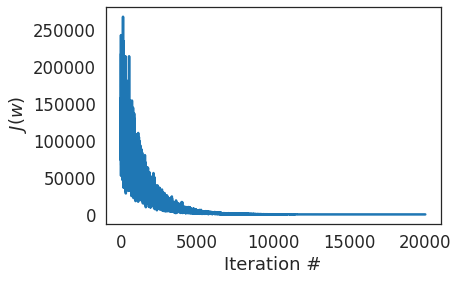

In [ ]:
plt.plot(lin_reg.err_all)
plt.xlabel("Iteration #")
plt.ylabel("$\ J(w)$")

In [ ]:
lin_reg = LinReg()
lin_reg.sgd(X_train,y_train,1000)
lin_reg.w

array([40.02115889, 10.30300732, 51.90705897,  6.30148634, 41.16088767,
       28.44311354, 88.95152024,  9.75484165, 15.46786403, 45.00362413])

Text(0, 0.5, '$\\ J(w)$')

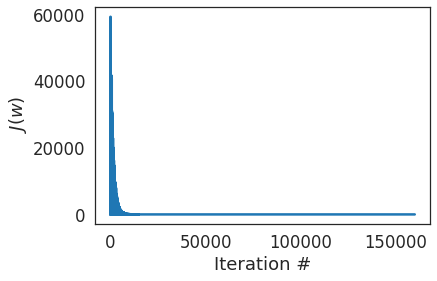

In [ ]:
plt.plot(lin_reg.err_all)
plt.xlabel("Iteration #")
plt.ylabel("$\ J(w)$")

# Linear Regression

In [ ]:
w0 = 4
w1 = 7
n = 100
x = 10*np.random.randn(n,)
y = w0 + w1*x + 5.8*np.random.randn(n,)

In [ ]:
x[:5]

array([20.40833764,  6.75818271, -8.29034735, -1.68782704,  6.99352142])

In [ ]:
print(f'Size of x:{x.shape}')
print(f'Size of y:{y.shape}')

Size of x:(100,)
Size of y:(100,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Size of x_train:{x_train.shape}')
print(f'Size of y_train:{y_train.shape}')
print(f'Size of x_test:{x_test.shape}')
print(f'Size of y_test:{x_test.shape}')

Size of x_train:(80,)
Size of y_train:(80,)
Size of x_test:(20,)
Size of y_test:(20,)


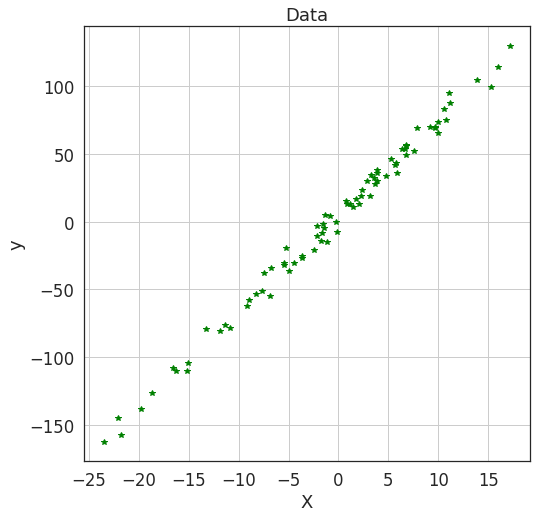

In [ ]:
sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2.5})

plt.plot(x_train, y_train, "g*")
plt.title("Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [ ]:
# Add dummy features
# t = np.array([[5, 4, 3, 2], [-10, -4, -9, 2]])
# np.column_stack((np.ones(t.shape[0]), t))
def add_dummy(t):
    return np.column_stack((np.ones(t.shape[0]), t))

x_train = add_dummy(x_train)
x_train[:5]

array([[  1.        , -11.81184098],
       [  1.        ,  -1.73004462],
       [  1.        ,  -3.61835915],
       [  1.        ,  -2.10154605],
       [  1.        ,   3.56106452]])

In [ ]:
def predicted(x, w):
    if x.shape[1] == w.shape[0]:
        return x @ w
    else:
        return False

w = np.random.randn(2, )
print(f'w is:\n{w}')

y_pred = predicted(x_train, w)
print(f'\ny predicted is:\n{y_pred[:5]}')

w is:
[ 0.81580796 -0.64603323]

y predicted is:
[ 8.44664978  1.93347428  3.15338822  2.17347655 -1.48475806]


In [ ]:
def loss(x, y, w):
    error = predicted(x, w) - y
    return (1/2)*(np.transpose(error) @ error)

In [ ]:
def loss_for_single_feature(x_train, y_train, w):
    y_pred = predicted(x_train, w)
    sns.set_style("white")
    f = plt.figure(figsize = (8,8))
    sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2.5})

    fig, axes = plt.subplots(figsize=(8,8))
    axes.plot(x_train[:, 1], y_train, "b.", label='Training')
    axes.plot(x_train[:, 1], y_pred, c='g', label='Data Points')
    # shows verticle lines with loss
    # axes.vlines(x, ymin, ymax, color=None)
    axes.vlines(x_train[:, 1], y_pred, y_train, 'r', label='Loss')
    plt.grid(True)
    plt.show()

In [ ]:
w

array([ 0.81580796, -0.64603323])

<Figure size 576x576 with 0 Axes>

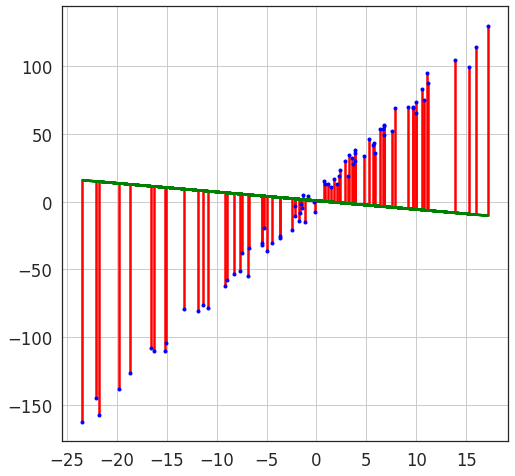

In [ ]:
loss_for_single_feature(x_train, y_train, w)

<Figure size 576x576 with 0 Axes>

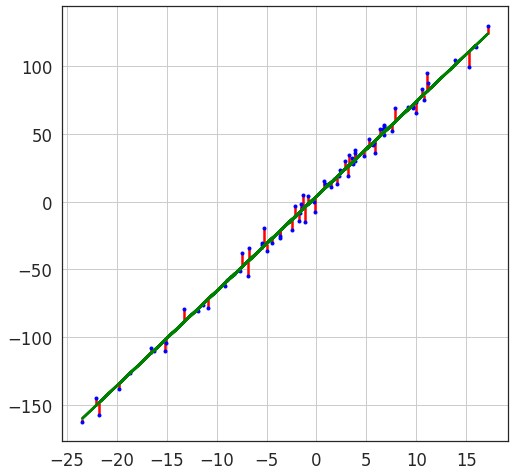

In [ ]:
# Loss for original w i,e. [4, 7]
loss_for_single_feature(x_train, y_train, np.array([4, 7]))

w calculated by normal equation

In [ ]:
def normal_eqn(x, y):
    return np.linalg.inv((np.transpose(x))@x) @(np.transpose(x)@y)

t = normal_eqn(x_train, y_train)
print(f'Updated weight:{t}\nActual weight:{w0, w1}')

Updated weight:[4.45119554 7.06634685]
Actual weight:(4, 7)


w calculation by gradient descent

In [ ]:
def gradient(x, y, w):
    return np.transpose(x) @ (predicted(x, w)-y)

# test for test case
x_t = np.array([[1,3,2,5], [1,9,4,7]])
y_t = np.array([6, 11])
w_t = np.array([1, 1, 1, 1])
grad_test = gradient(x_t, y_t, w_t)
print(f'Gradient is :{grad_test}')

Gradient is :[ 15 105  50  95]


In [ ]:
def update_weight(w, grad, lr):
    return (w-(lr*grad))

w_new = update_weight(w_t, grad_test, lr=0.001)
w_new

array([0.985, 0.895, 0.95 , 0.905])

In [ ]:
x_train.shape[1]

2

In [ ]:
# actual algorithm

def gradient_descent(X:np.ndarray, y:np.ndarray, lr:float, num_epoches:int):
    w_all = [] # store all weights
    error_all = [] # store loss

    w = np.zeros(X.shape[1]) # initial all 0 weights

    for i in range(num_epoches):
        w_all.append(w)
        error_all.append(loss(X, y, w))
        djdw = gradient(X, y, w)

        # print loss for every 100th iteration
        if i%100 == 0:
            print(f'Iteration #:{i}, loss:{round(error_all[-1], 4)}.')
        
        w = update_weight(w, djdw, lr)
    return w, error_all, w_all


print(x_train.shape)
print(y_train.shape)
w, error_all, w_all = gradient_descent(x_train, y_train, lr=0.0001, num_epoches=2000)

(80, 2)
(80,)
Iteration #:0, loss:174541.9872.
Iteration #:100, loss:1520.2948.
Iteration #:200, loss:1390.1495.
Iteration #:300, loss:1363.8509.
Iteration #:400, loss:1358.5368.
Iteration #:500, loss:1357.4629.
Iteration #:600, loss:1357.2459.
Iteration #:700, loss:1357.2021.
Iteration #:800, loss:1357.1932.
Iteration #:900, loss:1357.1914.
Iteration #:1000, loss:1357.1911.
Iteration #:1100, loss:1357.191.
Iteration #:1200, loss:1357.191.
Iteration #:1300, loss:1357.191.
Iteration #:1400, loss:1357.191.
Iteration #:1500, loss:1357.191.
Iteration #:1600, loss:1357.191.
Iteration #:1700, loss:1357.191.
Iteration #:1800, loss:1357.191.
Iteration #:1900, loss:1357.191.


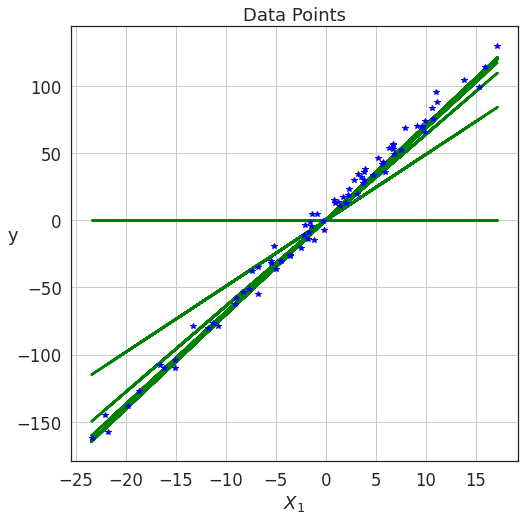

In [ ]:
sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2.5})

for i in range(15):
  y_plt = predicted(x_train,w_all[i])
  plt.plot(x_train[:,1],y_plt,"g")

plt.plot(x_train[:,1],y_train,"b*")
plt.title("Data Points")
plt.xlabel("$X_1$",fontsize = 18)
plt.ylabel("y",fontsize = 18, rotation = 0)
plt.grid(True)

Plot learning curve

Text(0, 0.5, '$\\ J(w)$')

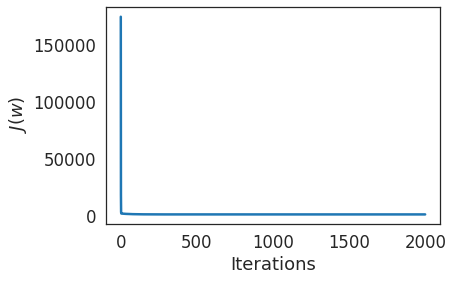

In [ ]:
plt.plot(error_all)
plt.xlabel("Iterations")
plt.ylabel("$\ J(w)$")

In [ ]:
# try for different learning rate
w, err, w_all = gradient_descent(x_train,y_train,lr=1e-6,num_epoches=2000)
w

Iteration #:0, loss:174541.9872.
Iteration #:100, loss:44722.5961.
Iteration #:200, loss:12652.5304.
Iteration #:300, loss:4723.1373.
Iteration #:400, loss:2755.7575.
Iteration #:500, loss:2260.9218.
Iteration #:600, loss:2129.8925.
Iteration #:700, loss:2088.8497.
Iteration #:800, loss:2070.1674.
Iteration #:900, loss:2057.1423.
Iteration #:1000, loss:2045.6474.
Iteration #:1100, loss:2034.6611.
Iteration #:1200, loss:2023.9292.
Iteration #:1300, loss:2013.3868.
Iteration #:1400, loss:2003.016.
Iteration #:1500, loss:1992.8102.
Iteration #:1600, loss:1982.766.
Iteration #:1700, loss:1972.8806.
Iteration #:1800, loss:1963.1515.
Iteration #:1900, loss:1953.5761.


array([0.61193082, 7.03850805])

Text(0, 0.5, '$\\ J(w)$')

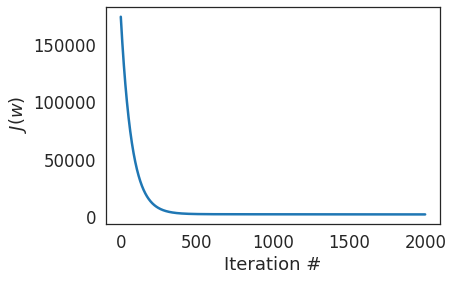

In [ ]:
plt.plot(err)
plt.xlabel("Iteration #")
plt.ylabel("$\ J(w)$")

In [ ]:
# lr = 1e-7
w, err, w_all = gradient_descent(x_train,y_train,lr=1e-7,num_epoches=2000)
w

Iteration #:0, loss:174541.9872.
Iteration #:100, loss:152109.0976.
Iteration #:200, loss:132595.2482.
Iteration #:300, loss:115620.5829.
Iteration #:400, loss:100854.6764.
Iteration #:500, loss:88010.1018.
Iteration #:600, loss:76836.8353.
Iteration #:700, loss:67117.3889.
Iteration #:800, loss:58662.5763.
Iteration #:900, loss:51307.8303.
Iteration #:1000, loss:44909.9987.
Iteration #:1100, loss:39344.558.
Iteration #:1200, loss:34503.189.
Iteration #:1300, loss:30291.6679.
Iteration #:1400, loss:26628.0326.
Iteration #:1500, loss:23440.9866.
Iteration #:1600, loss:20668.5114.
Iteration #:1700, loss:18256.6588.
Iteration #:1800, loss:16158.5011.
Iteration #:1900, loss:14333.2171.


array([0.03279853, 5.2895073 ])

Text(0, 0.5, '$\\ J(w)$')

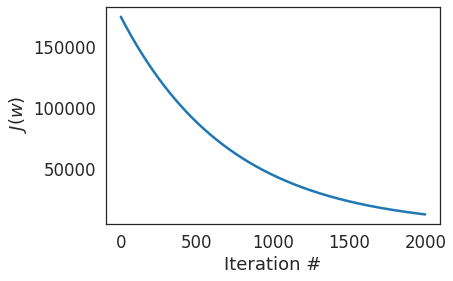

In [ ]:
plt.plot(err)
plt.xlabel("Iteration #")
plt.ylabel("$\ J(w)$")

Combining all

In [ ]:
class LinReg(object):
  """
  y = X@w
  X: A feature matrix
  w : weight vector
  y: label vector

  """
  def __init__(self):
    self.t0 = 20
    self.t1 = 100000

  def predict(self,X:np.ndarray):
    y = X @ self.w
    return y
  
  def loss(self, X:np.ndarray, y:np.ndarray):
    e =  self.predict(X)-y
    return ((1/2)*(np.transpose(e) @ e))

  def rmse (self, X:np.ndarray, y:np.ndarray):
    return np.sqrt((2/X.shape[0]) * self.loss(X,y)) #2/n * loss
  
  def fit (self, X:np.ndarray, y:np.ndarray):
    self.w = np.linalg.pinv(X) @ y
    return self.w
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray):
    return(np.transpose(X) @ (self.predict(X)-y))
  
  def update_weights(self, grad:np.ndarray, lr:float):
    return(self.w - lr*grad)

  def learning_schedule(self,t):
    return self.t0 / (t+self.t1)

  def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    for i in np.arange(0,num_epochs):
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      djdw = self.calculate_gradient(X,y)
      self.w = self.update_weights(djdw,lr)
    return self.w

  def mbgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
    mini_batch_id = 0

    for epoch in range(num_epochs):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]
      for i in range(0,X.shape[0],batch_size):
        mini_batch_id += 1
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2/batch_size * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(mini_batch_id))
    return self.w

  def sgd(self, X:np.ndarray, y:np.ndarray, num_epochs:int):
    self.w = np.zeros((X.shape[1]))
    self.w_all = []
    self.err_all = []
 
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
       
        random_index = np.random.randint(X.shape[0])
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        djdw = 2 * self.calculate_gradient(xi,yi)
        self.w = self.update_weights(djdw,self.learning_schedule(epoch * X.shape[0] + i))
    return self.w

# Polynomial regression

https://github.com/ctgk/PRML/blob/main/prml/preprocess/polynomial.py

- To get more polynomial features we need the combinations of single features like $x_1$, $x_2$, ....$x_n$.

- For a single degree polynomial: 
![image.png](https://drive.google.com/uc?export=view&id=1haGmVyzBK3BDigm4s_3XEiPIVkvGq_ze)

- For a second degree polynomial:
![image.png](https://drive.google.com/uc?export=view&id=12rEnqLWBNO-Qiu4xb6VOWr8-gUr1BsFZ)

In [ ]:
# to perform combination import two libraries
import itertools
import functools

def get_combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    return functools.reduce(lambda x, y:x*y, items)

# combinations of 2 and 3 with degree 3
x = [2, 3]
degree = 3
print('Combinations of x are:')
for i in get_combinations(x, degree):
    print(i)

Combinations of x are:
(2, 2, 2)
(2, 2, 3)
(2, 3, 3)
(3, 3, 3)


In [ ]:
x = [1]
degree = 3
{items: compute_new_features(items) for items in get_combinations(x, degree)}

{(1, 1, 1): 1}

In [ ]:
x = [1, 2, 3]
degree = 3
{items: compute_new_features(items) for items in get_combinations(x, degree)}

{(1, 1, 1): 1,
 (1, 1, 2): 2,
 (1, 1, 3): 3,
 (1, 2, 2): 4,
 (1, 2, 3): 6,
 (1, 3, 3): 9,
 (2, 2, 2): 8,
 (2, 2, 3): 12,
 (2, 3, 3): 18,
 (3, 3, 3): 27}

In [ ]:
def polynomial_transform(x:np.ndarray, degree:int, logging=False):
    # logging is just a flag smilar to verbos
    if x.ndim == 1:
        x = x[:, None]
    
    x_t = x.transpose() # transpose feature matrix
    features = [np.ones(len(x))] # 1 for each feature dummy

    if logging:
        print("Input:", x)
    for degree in range(1, degree+1):
        for items in get_combinations(x_t, degree): # generate combination
            features.append(compute_new_features(items)) # combine the generated features
            if logging:
                print(items, ":", compute_new_features(items))
        
    if logging:
        print(np.asarray(features).transpose())
    return np.asarray(features).transpose()

In [ ]:
# test the above function
polynomial_transform(np.array([2]), 3, logging=True)

Input: [[2]]
(array([2]),) : [2]
(array([2]), array([2])) : [4]
(array([2]), array([2]), array([2])) : [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [ ]:
polynomial_transform(np.array([2, 3]), 2, logging=True)

Input: [[2]
 [3]]
(array([2, 3]),) : [2 3]
(array([2, 3]), array([2, 3])) : [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [ ]:
polynomial_transform(np.array([[2, 3], [4, 5]]), degree=3, logging=True)

Input: [[2 3]
 [4 5]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([3, 5]), array([3, 5])) : [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4])) : [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5])) : [12 80]
(array([2, 4]), array([3, 5]), array([3, 5])) : [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5])) : [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

Generate data<br>
We generate synthetic data from function $\sin(2{\pi}{x_1}) + noise$<br>
Noise has gaussian distribution.

In [ ]:
# synthetically generated data
def create_nonlin_training_set(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def nonlin(x): # origional function
    return np.sin(2*np.pi*x)

Plot training data

In [ ]:
def visualize_training_data(x_train, y_train):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    # plot x_train and y_train
    plt.scatter(x_train, y_train, facecolors='none', edgecolor='b', s=50, label='training data')
    #plot origional data
    plt.plot(points, output, c='g', label="$\sin(2\pi x)$")
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def visualize_model_fit(x, y, lin_reg, degree):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0:
        plt.scatter(x, y, facecolor='none', edgecolor='b', s=50, label='training data')
    plt.plot(points, output, c='g', label="$h_\mathbf{w}(x)$")

    y_hat = lin_reg.predict(polynomial_transform(points, degree))
    plt.plot(points, y_hat, c="r", label="$h_\mathbf{w}(x)$")
    plt.xlabel("$x_1$")
    plt.ylabel("y")
    plt.ylim(-1.5, 1.5)
    plt.title("M={}".format(degree))    # xy = (-0.15, 1)

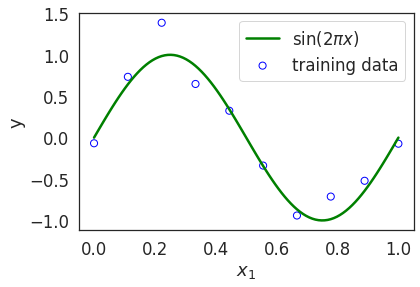

In [ ]:
# test the above function
num_samples = 10
x, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(x, y)

Train the model on the data

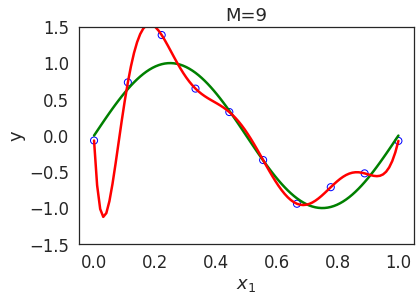

In [ ]:
degree = 9
x_transform = polynomial_transform(x, degree)
lin_reg = LinReg()
lin_reg.fit(x_transform, y)
visualize_model_fit(x, y, lin_reg, degree)

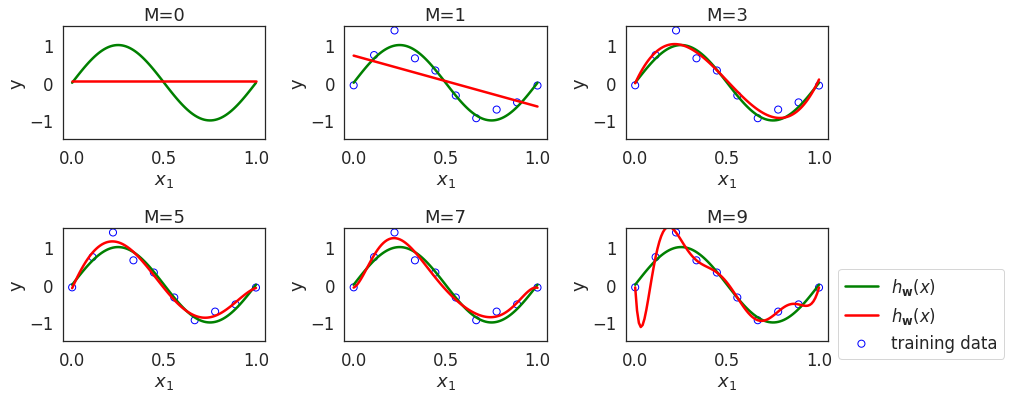

In [ ]:
# consolidate plot of every degree
f = plt.figure(figsize = (12,8))
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2.5})

for i, degree in enumerate([0, 1, 3, 5, 7, 9]):
    plt.subplot(3, 3, i+1)
    x_transform = polynomial_transform(x, degree)
    lin_reg = LinReg()
    lin_reg.fit(x_transform, y)
    visualize_model_fit(x, y, lin_reg, degree)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

## L2 Regularization (Ridge regression)

![image.png](https://drive.google.com/uc?export=view&id=1qhp29NtfA4EQhkRpYyftHmthGxPmNlHb)

- For the loss function $\frac{1}{2}(Xw-y)^T(Xw-y) +\frac{\lambda}{2}{w^T}{w}$

    - the first part $(Xw-y)^T(Xw-y)$ gives rise ti eliptical contors centered around the linear regression or least square error solution.
    - The second part $w^Tw$ represents a circle.
    - The ridge regression solution lies at intersection of contours of these two functions. The intersection varies as function of $\lambda$.
        - As $\lambda \rightarrow 0$, the solution is a solution of least square, i.e. without regularization.
        - As $\lambda \rightarrow \infty$, the solution is centre of circle , which is $0$ vector.

In [ ]:
class LinReg_n():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
        
    def loss (self, X, y, reg_rate):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e) + (reg_rate/2) * (np.transpose(self.w) @ self.w) # change made

    def rmse(self,X, y, reg_rate):
        return np.sqrt(2/X.shape[0] * self.loss(X, y, reg_rate)) # change made

    def fit(self, X, y, reg_rate):
  #         self.w = np.linalg.pinv(X) @ y
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(X.T @ X + reg_rate * eye, X.T @ y)
        return self.w

    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.predict(X) - y) + reg_rate * self.w # change made

    def update_weights(self, grad, lr):
        return (self.w - lr * grad)

    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)

    def gd(self, X, y, num_epochs, lr, reg_rate):
        self.w = np.zeros(X.shape[1])
        self.w_all = list() 
        self.err_all = list()
        for i in range(num_epochs):
            dJdw = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdw, lr)
        return self.w

    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()
        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

Test the hardcoded function **LinReg_n**

In [ ]:
X = np.array([[1, 3, 2, 5],[1, 9, 4, 7]])
y = np.array([6, 11])
w = np.ones(X.shape[1])
reg_rate = 0.01

lin_reg_n = LinReg_n()
lin_reg_n.w = w
lin_reg_n.w

array([1., 1., 1., 1.])

In [ ]:
lin_reg_n.loss(X, y, reg_rate)

62.52

In [ ]:
lin_reg_n.calculate_gradient(X, y, reg_rate)

array([ 15.01, 105.01,  50.01,  95.01])

Ridge for fixing overfitting

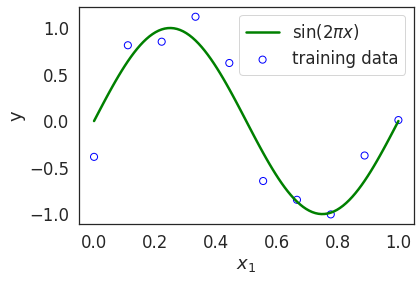

In [ ]:
# plotting of actual data
num_samples = 10
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

### Model without Regularization

In [ ]:
def visualize_model_fit_no_reg(x, y, lin_reg_n, degree, reg_rate):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0:
        plt.scatter(x, y, facecolor='none', edgecolor='b', s=50, label='training data')
    plt.plot(points, output, c='g', label="$h_\mathbf{w}(x)$")

    y_hat = lin_reg_n.predict(polynomial_transform(points, degree))
    plt.plot(points, y_hat, c="r", label="$h_\mathbf{w}(x)$")
    plt.xlabel("$x_1$")
    plt.ylabel("y")
    plt.ylim(-1.5, 1.5)
    plt.title(f'M={degree}, $\lambda$ = {reg_rate}')    # xy = (-0.15, 1)

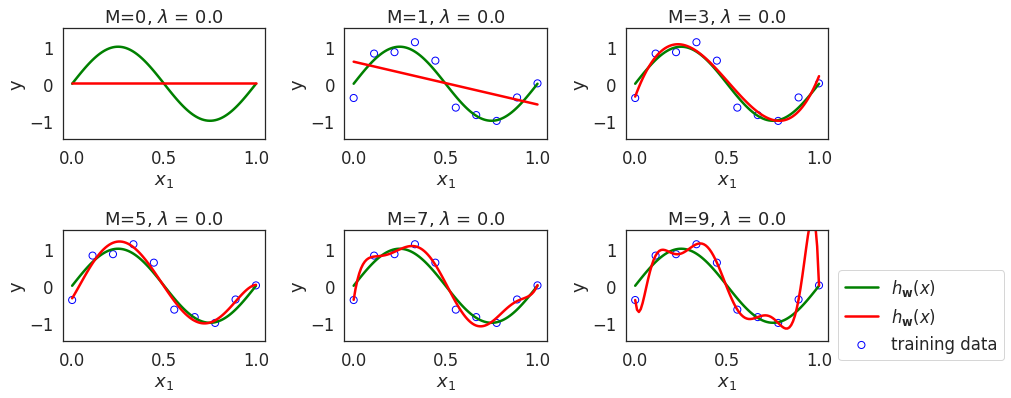

In [ ]:
# fit model without regularization 
f = plt.figure(figsize = (12,8))
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2.5})

for i, degree in enumerate([0, 1, 3, 5, 7, 9]):
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg_n = LinReg_n()
    lin_reg_n.fit(X_transform, y, reg_rate=0.00)
    visualize_model_fit_no_reg(X, y, lin_reg_n, degree, reg_rate=0.00)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

### Model with regularization
$\lambda$ = 0.01

In [ ]:
def visualize_model_fit_with_reg(x, y, lin_reg_n, degree, reg_rate):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0:
        plt.scatter(x, y, facecolor='none', edgecolor='b', s=50, label='training data')
    plt.plot(points, output, c='g', label="$h_\mathbf{w}(x)$")

    y_hat = lin_reg_n.predict(polynomial_transform(points, degree))
    plt.plot(points, y_hat, c="r", label="$h_\mathbf{w}(x)$")
    plt.xlabel("$x_1$")
    plt.ylabel("y")
    plt.ylim(-1.5, 1.5)
    plt.title(f'M={degree}, $\lambda$ = {reg_rate}')    # xy = (-0.15, 1)

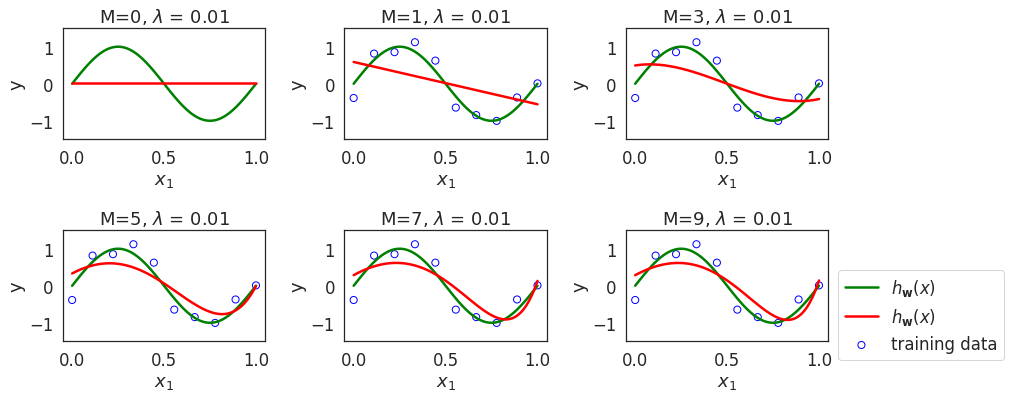

In [ ]:
# fit model without regularization 
reg_rate = 0.01
f = plt.figure(figsize = (12,8))
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2.5})

for i, degree in enumerate([0, 1, 3, 5, 7, 9]):
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg_n = LinReg_n()
    lin_reg_n.fit(X_transform, y, reg_rate)
    visualize_model_fit_with_reg(X, y, lin_reg_n, degree, reg_rate)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

Fix degree=9 and vary $\lambda$

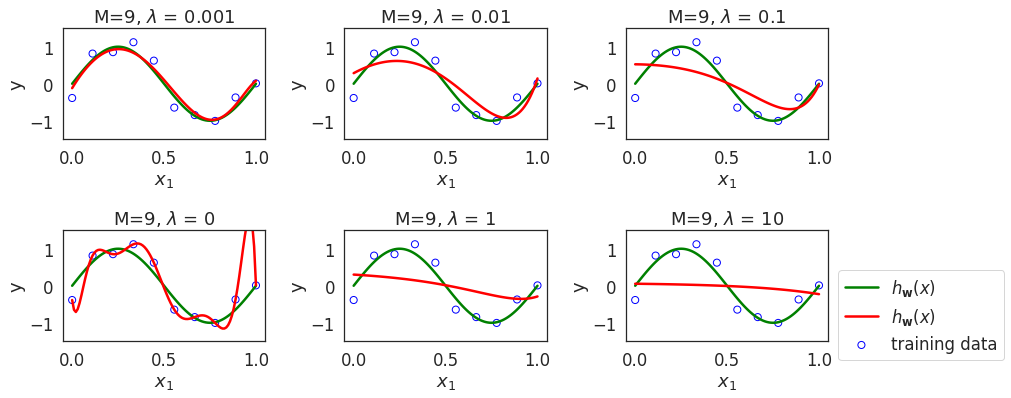

In [ ]:
# fit model without regularization 
reg_rate = 0.01
f = plt.figure(figsize = (12,8))
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth":2.5})

for i, reg_rate in enumerate([1e-3, 1e-2, 1e-1, 0, 1, 10]):
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg_n = LinReg_n()
    lin_reg_n.fit(X_transform, y, reg_rate)
    visualize_model_fit_with_reg(X, y, lin_reg_n, degree, reg_rate)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

We can see that as $\lambda$ increases the model starts to underfit more and more.

### Model selection

Helper Function

In [ ]:
def plot_reg_w(w_df) :
    ax = plt.gca( )
    ax.plot (w_df.T)
    ax.set_xscale( 'log')
    plt.set_xlim(ax. get_xlim( ) [ : :-1])
    plt.xlabel( '$\lambda$' )
    plt.ylabel ( '$\mathbf {w} $ ' )
    plt.title( 'Weights as a function of $\lambda$' )
    plt.axis( ' tight')
    plt.show()

def plot_learning_curve (err_df) :
    ax = plt.gca()
    ax. plot (err_df)
    ax . set_xscale('log')
    ax. set_xlim(ax. get_xlim()[ : :-1])

    plt.xlabel('$\lambda$ ')
    plt.ylabel('RMSE')
    plt.title('Training and validation losses as function of $\lambda$')
    plt.axis('tight')
    plt.legend(['training', 'validation' ])
    plt.show ()


In [ ]:
# plotting of learning curve
#Create the validation set
x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

#Transform it
degree = 9
X_val_transform = polynomial_transform(x_val, degree,logging=False)


w_dict = dict()
training_errors = dict()
val_errors = dict()

for reg_rate in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 10, 100]:
    lin_reg_n = LinReg_n()
    #Find the rmse for training set.
    lin_reg_n.fit(X_transform, y, reg_rate)

    w_dict[reg_rate] = lin_reg_n.w
    training_errors[reg_rate] = lin_reg_n.rmse(X_transform, y, reg_rate)
    #Find the rmse for validation set
    lin_reg_n.fit(X_val_transform, y_val, reg_rate)
    val_errors[reg_rate] = lin_reg_n.rmse(X_val_transform, y_val + 
                                        np.random.normal(scale=0.25, size=len(y_val)), reg_rate)
err_df = pd.DataFrame([training_errors, val_errors], index=['Training errors', 'Validation Errors']).T
w_df = pd.DataFrame(w_dict)

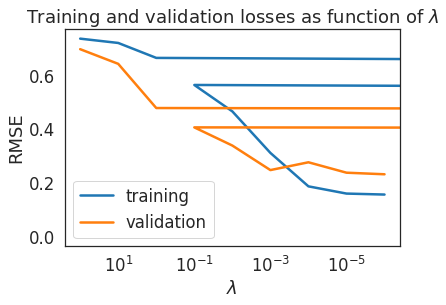

In [ ]:
# plot learning curve
plot_learning_curve(err_df)

- Ridge vs Lasso.
![image.png](https://drive.google.com/uc?export=view&id=1PqI_HuEXa-UYqPFrMCd01aZaJfowLuzr)